In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# GOOGLE

google = pd.read_csv("gafa_alph_goo_usd_2017_2022.csv")
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,778.809998,807.900024,775.799988,806.150024,806.150024,5705700
1,2017-01-08,806.400024,811.223999,799.169983,807.880005,807.880005,5969600
2,2017-01-15,807.080017,809.479980,800.369995,805.020020,805.020020,5245800
3,2017-01-22,807.250000,841.950012,803.739990,823.309998,823.309998,10871800
4,2017-01-29,814.659973,815.840027,790.520020,801.489990,801.489990,10432400


In [67]:
google.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [68]:
ts = google["Close"][-10:]
type(ts)

pandas.core.series.Series

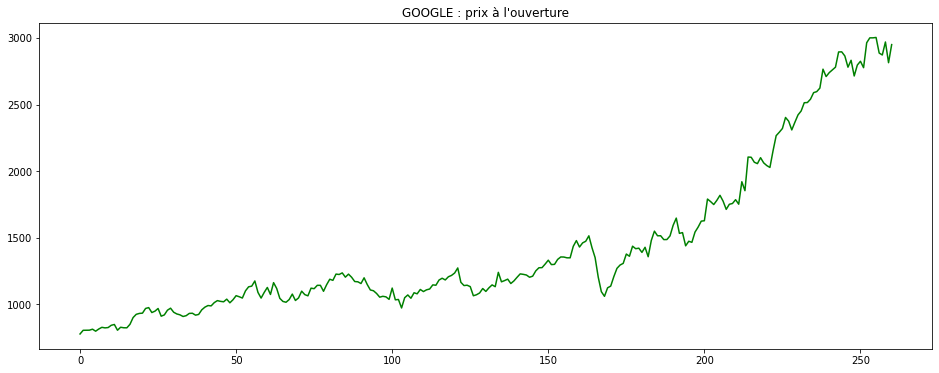

In [69]:
# prix à l'ouverture

plt.figure(figsize = (16,6))
plt.plot(google["Open"], color = "green")
plt.title("GOOGLE : prix à l'ouverture")
plt.show()

In [70]:
# weekly return

weekly_close_g = google[["Close"]]
weekly_return_g = weekly_close_g.pct_change()
weekly_return_g.fillna(0, inplace = True)
print(weekly_return_g)

        Close
0    0.000000
1    0.002146
2   -0.003540
3    0.022720
4   -0.026503
..        ...
256 -0.001999
257  0.043183
258 -0.039496
259  0.030388
260 -0.016739

[261 rows x 1 columns]


In [71]:
# weekly log return pour mieux visualiser l'accroissement du return en fct du tps

weekly_return_g_log = np.log(weekly_close_g.pct_change()+1)
print(weekly_return_g_log)
weekly_return_g_log.fillna(0, inplace = True)

        Close
0         NaN
1    0.002144
2   -0.003546
3    0.022466
4   -0.026860
..        ...
256 -0.002001
257  0.042277
258 -0.040297
259  0.029935
260 -0.016881

[261 rows x 1 columns]


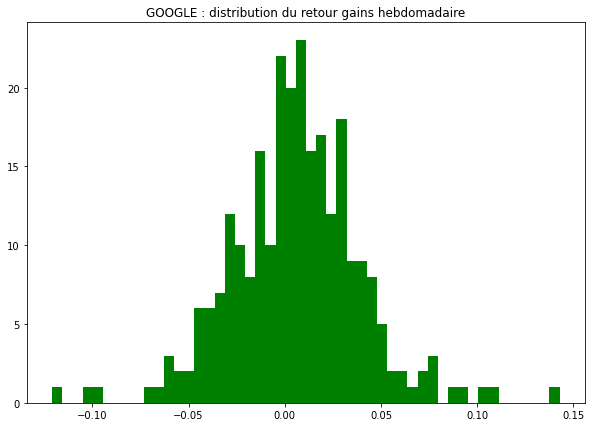

In [72]:
# distribution du weekly return
plt.figure(figsize = (10,7))
plt.title("GOOGLE : distribution du retour gains hebdomadaire")
plt.hist(weekly_return_g, bins = 50, color = "green")
plt.show()

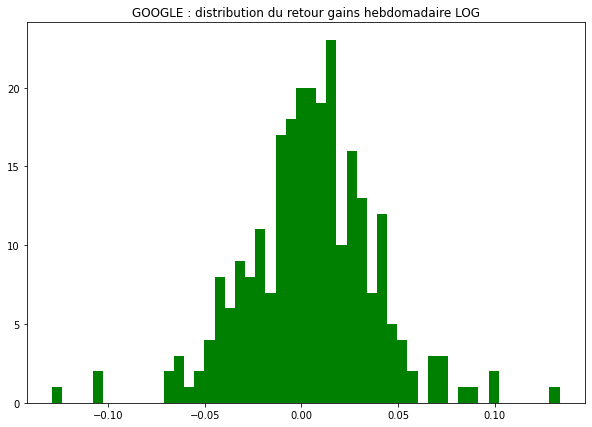

In [73]:
# par curiosité, je fais pareil avec le log
plt.figure(figsize = (10,7))
plt.title("GOOGLE : distribution du retour gains hebdomadaire LOG")
plt.hist(weekly_return_log, bins = 50, color = "green")
plt.show()

In [74]:
# taux de retour hebdomadaire cumulatif
weekly_return_cum_g = (1+weekly_return_g).cumprod()
print(weekly_return_cum_g.head())

      Close
0  1.000000
1  1.002146
2  0.998598
3  1.021286
4  0.994219


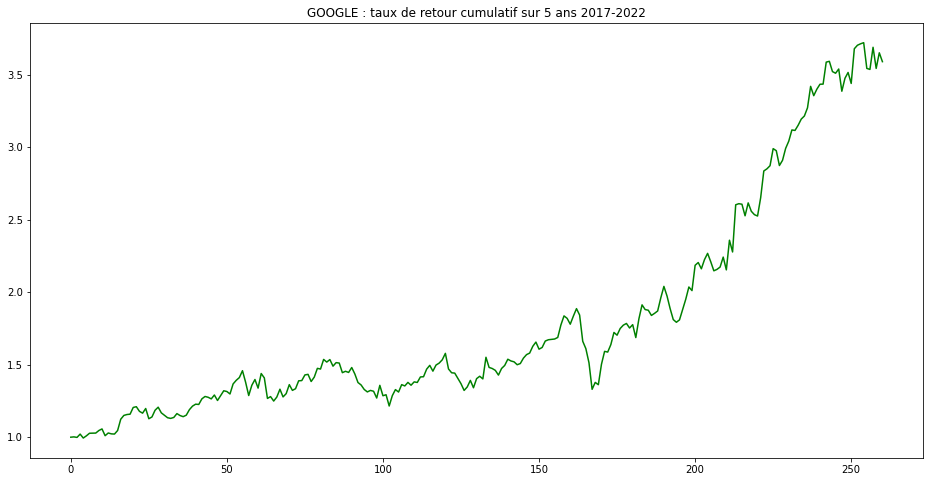

In [75]:
plt.figure(figsize = (16,8))
plt.title("GOOGLE : taux de retour cumulatif sur 5 ans 2017-2022")
plt.plot(weekly_return_cum, color = "green")
plt.show()

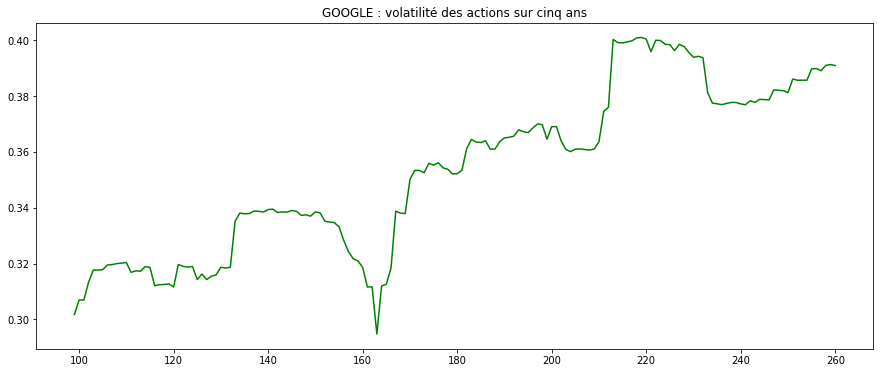

In [76]:
# volatilité des actions
# plus la volatilité est grande, et plus il y a de risques à investir
min_period = 100
vol_g = weekly_return_g.rolling(min_period).std() * np.sqrt(min_period)

plt.figure(figsize = (15,6))
plt.title("GOOGLE : volatilité des actions sur cinq ans")
plt.plot(vol_g, color = "green")
plt.show()

In [77]:
# AMAZON

amz = pd.read_csv("gafa_amzn_usd_2017_2022.csv")
display(amz.head())
amz.isna().sum()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,757.919983,799.440002,747.700012,795.989990,795.989990,17847900
1,2017-01-08,798.000000,821.650024,789.510010,817.140015,817.140015,17663100
2,2017-01-15,815.700012,816.020020,803.440002,808.330017,808.330017,11941700
3,2017-01-22,806.799988,843.840027,805.080017,835.770020,835.770020,16276800
4,2017-01-29,833.000000,842.489990,804.000000,810.200012,810.200012,28954000


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

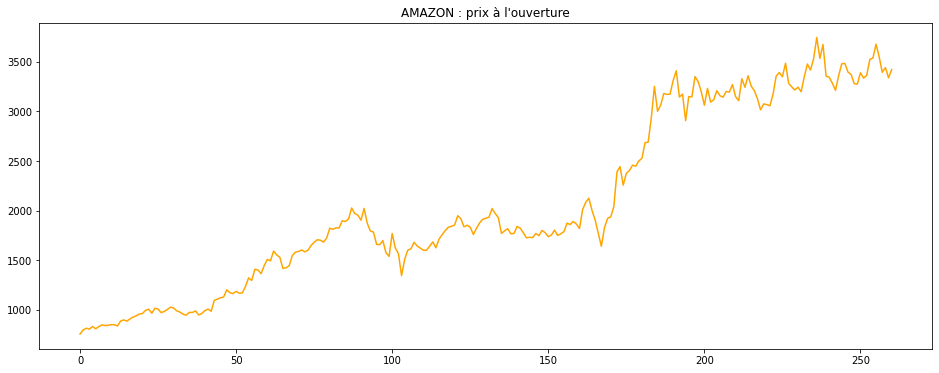

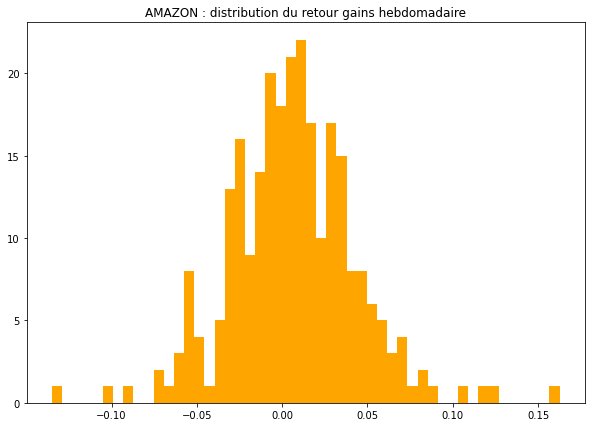

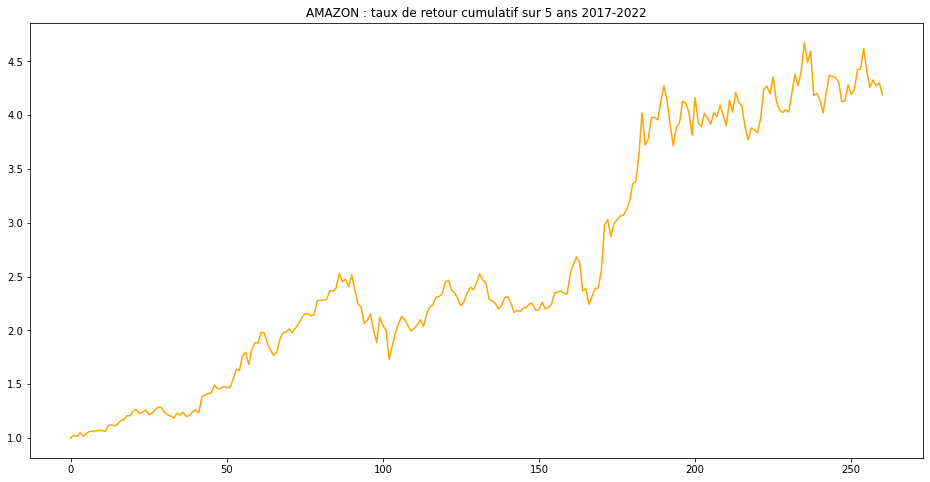

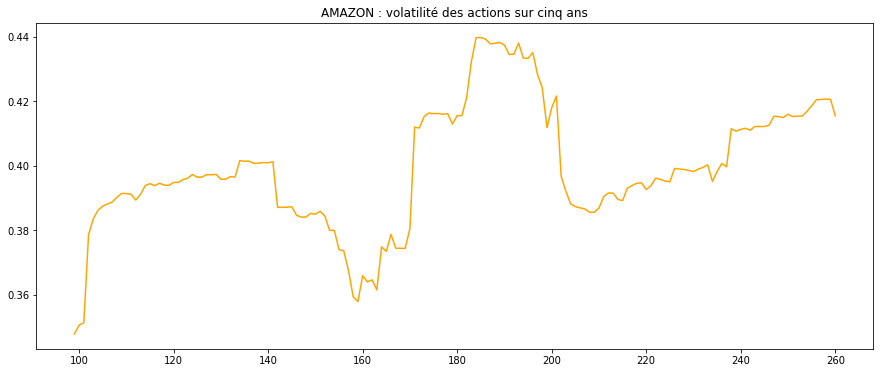

In [78]:
# prix des actions à l'ouverture
plt.figure(figsize = (16,6))
plt.plot(amz["Open"], color = "orange")
plt.title("AMAZON : prix à l'ouverture")
plt.show()

# weekly return
weekly_close_amz = amz[["Close"]]
weekly_return_amz = weekly_close_amz.pct_change()
weekly_return_amz.fillna(0, inplace = True)

plt.figure(figsize = (10,7))
plt.title("AMAZON : distribution du retour gains hebdomadaire")
plt.hist(weekly_return_amz, bins = 50, color = "orange")
plt.show()

# taux de retour hebdomadaire cumulatif
weekly_return_cum_amz = (1+weekly_return_amz).cumprod()

plt.figure(figsize = (16,8))
plt.title("AMAZON : taux de retour cumulatif sur 5 ans 2017-2022")
plt.plot(weekly_return_cum_amz, color = "orange")
plt.show()

# volatilité
min_period = 100
vol_amz = weekly_return_amz.rolling(min_period).std() * np.sqrt(min_period)

plt.figure(figsize = (15,6))
plt.title("AMAZON : volatilité des actions sur cinq ans")
plt.plot(vol_amz, color = "orange")
plt.show()

In [79]:
# FACEBOOK

fb = pd.read_csv("gafa_metaplatforms_facebook_usd_2017_2022.csv")
display(fb.head())
fb.isna().sum()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,116.029999,123.879997,115.510002,123.410004,123.410004,88332300
1,2017-01-08,123.550003,129.270004,123.040001,128.339996,128.339996,102099700
2,2017-01-15,128.039993,128.479996,126.779999,127.040001,127.040001,59733100
3,2017-01-22,127.309998,133.139999,126.949997,132.179993,132.179993,90047200
4,2017-01-29,131.580002,135.490005,129.520004,130.979996,130.979996,168057700


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

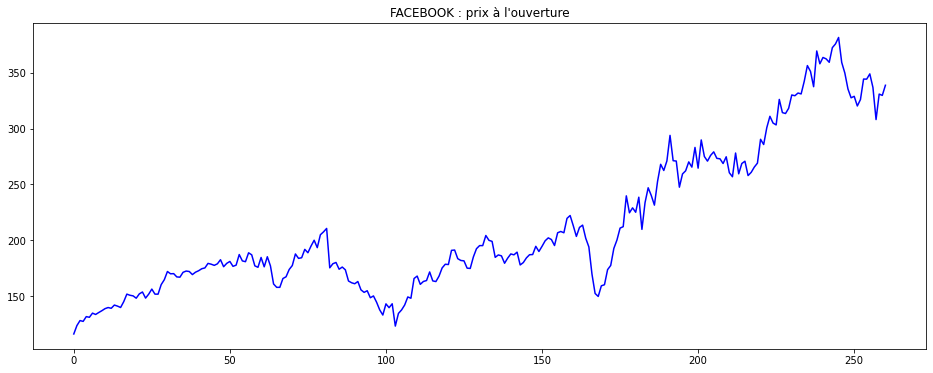

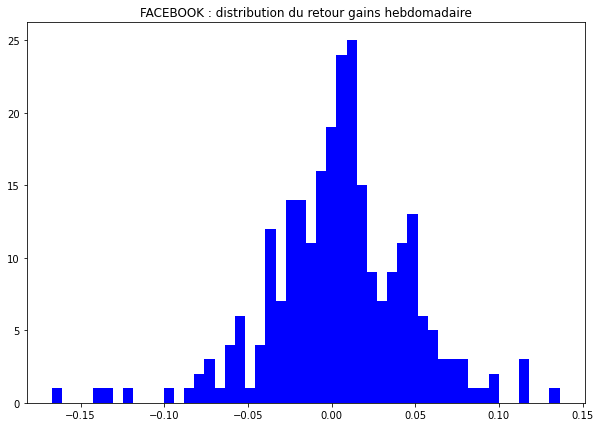

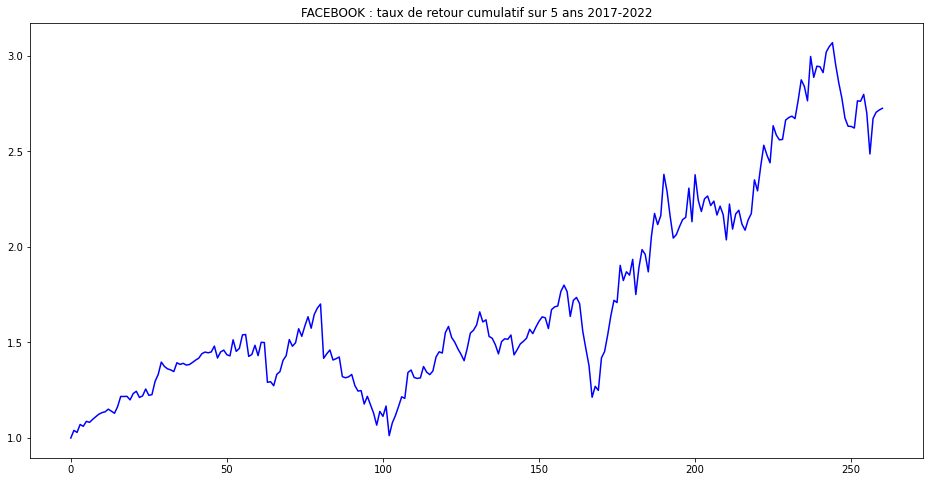

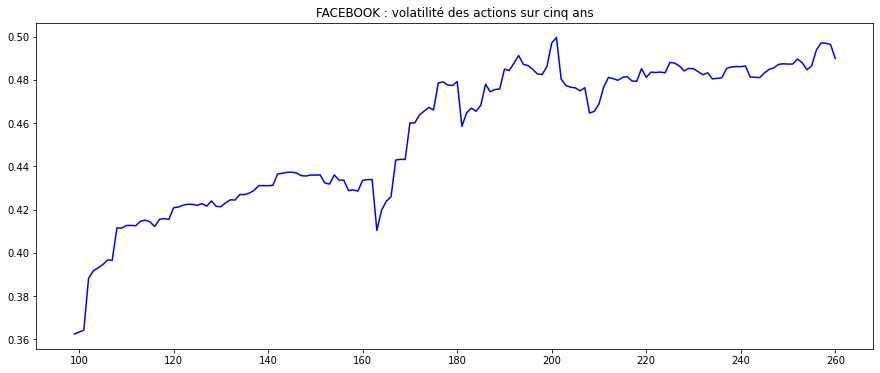

In [80]:
# prix des actions à l'ouverture
plt.figure(figsize = (16,6))
plt.plot(fb["Open"], color = "blue")
plt.title("FACEBOOK : prix à l'ouverture")
plt.show()

# weekly return
weekly_close_fb = fb[["Close"]]
weekly_return_fb = weekly_close_fb.pct_change()
weekly_return_fb.fillna(0, inplace = True)

plt.figure(figsize = (10,7))
plt.title("FACEBOOK : distribution du retour gains hebdomadaire")
plt.hist(weekly_return_fb, bins = 50, color = "blue")
plt.show()

# taux de retour hebdomadaire cumulatif
weekly_return_cum_fb = (1+weekly_return_fb).cumprod()

plt.figure(figsize = (16,8))
plt.title("FACEBOOK : taux de retour cumulatif sur 5 ans 2017-2022")
plt.plot(weekly_return_cum_fb, color = "blue")
plt.show()

# volatilité
min_period = 100
vol_fb = weekly_return_fb.rolling(min_period).std() * np.sqrt(min_period)

plt.figure(figsize = (15,6))
plt.title("FACEBOOK : volatilité des actions sur cinq ans")
plt.plot(vol_fb, color = "blue")
plt.show()

In [81]:
# APPLE

ap = pd.read_csv("gafa_apple_usd_2017_2022.csv")
display(amz.head())
amz.isna().sum()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,757.919983,799.440002,747.700012,795.989990,795.989990,17847900
1,2017-01-08,798.000000,821.650024,789.510010,817.140015,817.140015,17663100
2,2017-01-15,815.700012,816.020020,803.440002,808.330017,808.330017,11941700
3,2017-01-22,806.799988,843.840027,805.080017,835.770020,835.770020,16276800
4,2017-01-29,833.000000,842.489990,804.000000,810.200012,810.200012,28954000


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

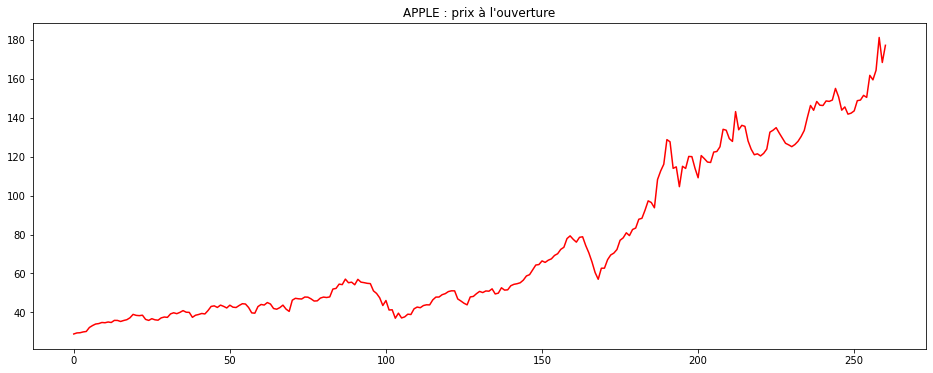

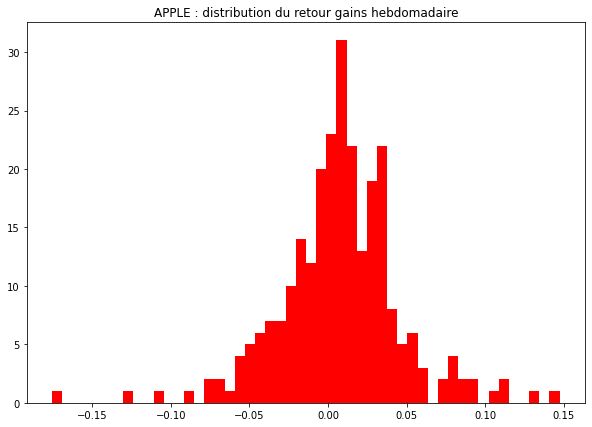

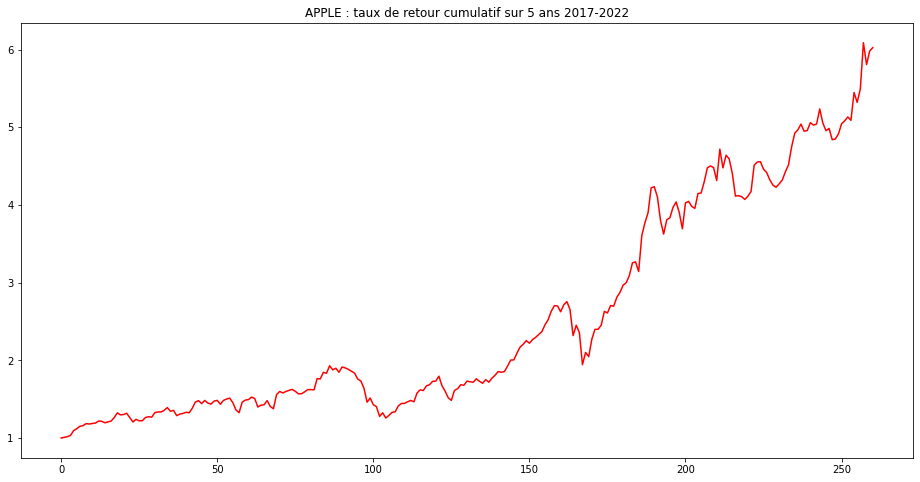

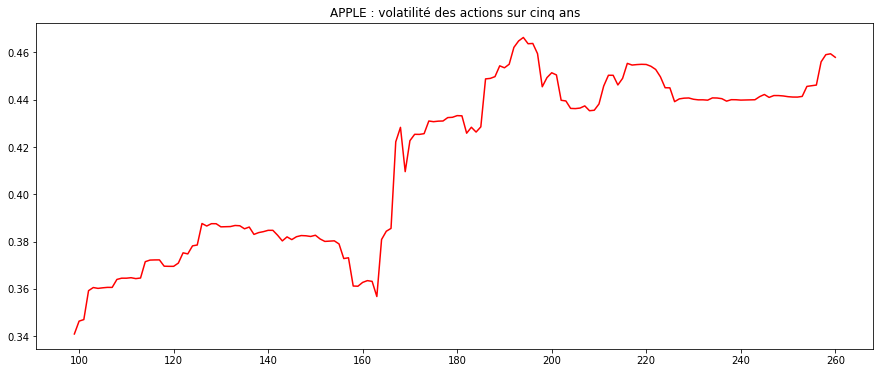

In [82]:
# prix des actions à l'ouverture
plt.figure(figsize = (16,6))
plt.plot(ap["Open"], color = "red")
plt.title("APPLE : prix à l'ouverture")
plt.show()

# weekly return
weekly_close_ap = ap[["Close"]]
weekly_return_ap = weekly_close_ap.pct_change()
weekly_return_ap.fillna(0, inplace = True)

plt.figure(figsize = (10,7))
plt.title("APPLE : distribution du retour gains hebdomadaire")
plt.hist(weekly_return_ap, bins = 50, color = "red")
plt.show()

# taux de retour hebdomadaire cumulatif
weekly_return_cum_ap = (1+weekly_return_ap).cumprod()

plt.figure(figsize = (16,8))
plt.title("APPLE : taux de retour cumulatif sur 5 ans 2017-2022")
plt.plot(weekly_return_cum_ap, color = "red")
plt.show()

# volatilité
min_period = 100
vol_ap = weekly_return_ap.rolling(min_period).std() * np.sqrt(min_period)

plt.figure(figsize = (15,6))
plt.title("APPLE : volatilité des actions sur cinq ans")
plt.plot(vol_ap, color = "red")
plt.show()

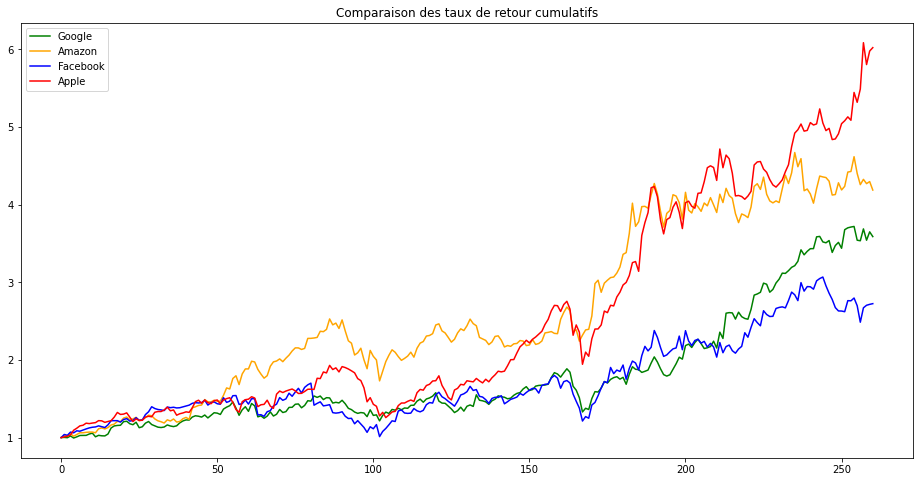

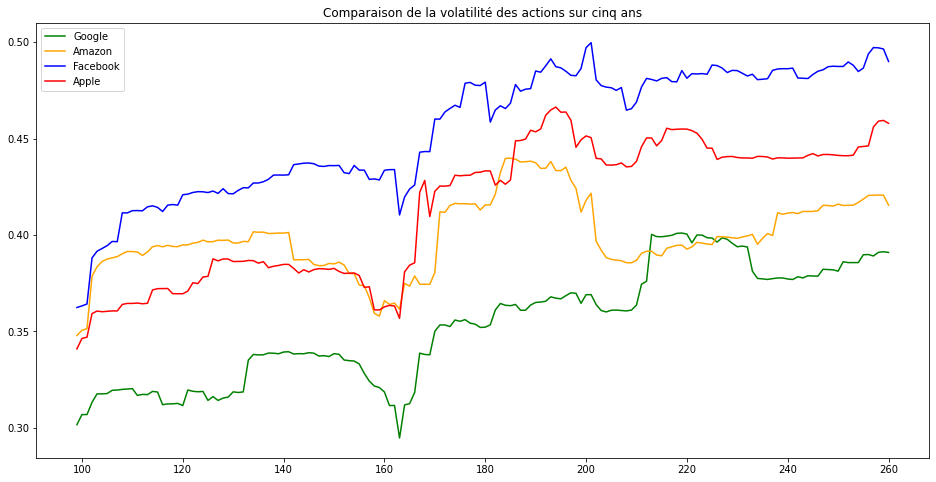

In [83]:
# comparaison du prix des actions sur cinq ans
plt.figure(figsize = (16,8))
plt.title("Comparaison du prix des actions")
plt.plot(google["Open"], color = "green", label = "Google")
plt.plot(amz["Open"], color = "orange", label = "Amazon")
plt.plot(fb["Open"], color = "blue", label = "Facebook")
plt.plot(ap["Open"], color = "red", label = "Apple")
plt.legend()
plt.show()

# comparaison du taux de retour sur les GAFA

plt.figure(figsize = (16,8))
plt.title("Comparaison des taux de retour cumulatifs")
plt.plot(weekly_return_cum_g, color = "green", label = "Google")
plt.plot(weekly_return_cum_amz, color = "orange", label = "Amazon")
plt.plot(weekly_return_cum_fb, color = "blue", label = "Facebook")
plt.plot(weekly_return_cum_ap, color = "red", label = "Apple")
plt.legend()
plt.show()

# Comparaison de la volatilité des actions sur les GAFA

plt.figure(figsize = (16,8))
plt.title("Comparaison de la volatilité des actions sur cinq ans")
plt.plot(vol_g, color = "green", label = "Google")
plt.plot(vol_amz, color = "orange", label = "Amazon")
plt.plot(vol_fb, color = "blue", label = "Facebook")
plt.plot(vol_ap, color = "red", label = "Apple")
plt.legend()
plt.show()


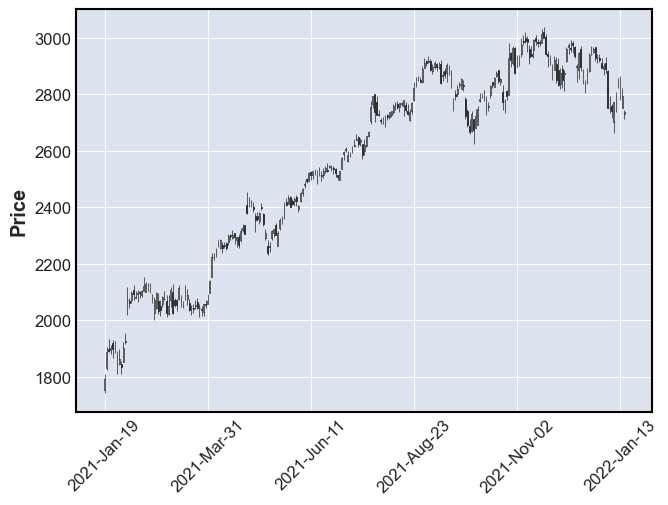

In [99]:
# essai graphe candle avec mplfinance et yahoo pour GOOGLE
import mplfinance as mpf
import yfinance as yf

google2 = yf.Ticker("GOOG").history("1y")
mpf.plot(google2, type = "candle")
